#### Prepared for Gabor's Data Analysis

# Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

# Chapter 17

Data preparation

In [51]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt

# Import data

In [52]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/cs_bisnode_panel.csv")
data

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


In [53]:
data.columns

Index(['comp_id', 'begin', 'end', 'COGS', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'finished_prod',
       'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories',
       'liq_assets', 'material_exp', 'net_dom_sales', 'net_exp_sales',
       'personnel_exp', 'profit_loss_year', 'sales', 'share_eq',
       'subscribed_cap', 'tang_assets', 'wages', 'D', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')

In [54]:
data["year"].value_counts().sort_values(ascending=True)

year
2016     9743
2005    19147
2006    20200
2007    21804
2008    23733
2009    25596
2010    26784
2015    27506
2014    28151
2011    28222
2012    28469
2013    28474
Name: count, dtype: int64

In [55]:
# drop variables with many NAs
data = data.drop(
    columns=["COGS", "finished_prod", "net_dom_sales", "net_exp_sales", "wages"]
)
data = data.query("year !=2016")

In [56]:
data.columns

Index(['comp_id', 'begin', 'end', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets',
       'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets',
       'material_exp', 'personnel_exp', 'profit_loss_year', 'sales',
       'share_eq', 'subscribed_cap', 'tang_assets', 'D', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')

In [57]:
data["year"].value_counts()

year
2013    28474
2012    28469
2011    28222
2014    28151
2015    27506
2010    26784
2009    25596
2008    23733
2007    21804
2006    20200
2005    19147
Name: count, dtype: int64


# Label engineering


In [58]:
data.shape

(278086, 43)

In [59]:
# 1. Count number of years for each company
years_per_firm = data.groupby("comp_id")["year"].nunique()

# 2. Find companies with fewer years than the full range
full_year_range = data["year"].nunique()
incomplete_firms = years_per_firm[years_per_firm < full_year_range]

# 3. Display those firms
print("Firms with missing years:")
print(incomplete_firms)

Firms with missing years:
comp_id
1.001541e+06     7
1.002029e+06     9
1.003200e+06     8
1.004012e+06     8
1.004898e+06     1
                ..
4.640212e+11     9
4.640446e+11     8
4.640568e+11     3
4.640793e+11     1
4.641209e+11    10
Name: year, Length: 36503, dtype: int64


In [60]:
data.loc[data["comp_id"] == 1.001541e+06, "year"]

11    2009
12    2010
13    2011
14    2012
15    2013
16    2014
17    2015
Name: year, dtype: int64

In [61]:
data[data["comp_id"] == 1.001541e+06]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
11,1001541.0,2009-01-01,2009-12-31,0.000000,2040.740723,933.333313,0.0,0.000000,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
12,1001541.0,2010-01-01,2010-12-31,0.000000,1740.740723,844.444458,0.0,0.000000,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
13,1001541.0,2011-01-01,2011-12-31,0.000000,127403.703125,127325.929688,0.0,0.000000,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
14,1001541.0,2012-01-01,2012-12-31,481.481476,9629.629883,1303.703735,0.0,0.000000,0.000000,190566.671875,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
15,1001541.0,2013-01-01,2013-12-31,2292.592529,4811.111328,925.925903,0.0,74.074074,74.074074,188274.078125,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
16,1001541.0,2014-01-01,2014-12-31,2292.592529,6500.000000,296.296295,0.0,0.000000,0.000000,185981.484375,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN
17,1001541.0,2015-01-01,2015-12-31,2292.592529,8729.629883,0.000000,0.0,0.000000,0.000000,183688.890625,...,male,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN


In [62]:
# add all missing year and comp_id combinations -
# originally missing combinations will have NAs in all other columns
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)  # only way I could define it as NaN

/tmp/ipykernel_1829/1426590344.py:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
/tmp/ipykernel_1829/1426590344.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [63]:
data.loc[data["comp_id"] == 1.001541e+06, "year"]

1         2005
46413     2006
92825     2007
139237    2008
185649    2009
232061    2010
278473    2011
324885    2012
371297    2013
417709    2014
464121    2015
Name: year, dtype: int64

In [64]:
data[data["comp_id"] == 1.001541e+06]

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
1,2005,1001541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46413,2006,1001541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92825,2007,1001541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139237,2008,1001541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185649,2009,1001541.0,2009-01-01,2009-12-31,0.000000,2040.740723,933.333313,0.0,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN
232061,2010,1001541.0,2010-01-01,2010-12-31,0.000000,1740.740723,844.444458,0.0,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN
278473,2011,1001541.0,2011-01-01,2011-12-31,0.000000,127403.703125,127325.929688,0.0,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN
324885,2012,1001541.0,2012-01-01,2012-12-31,481.481476,9629.629883,1303.703735,0.0,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN
371297,2013,1001541.0,2013-01-01,2013-12-31,2292.592529,4811.111328,925.925903,0.0,74.074074,74.074074,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN
417709,2014,1001541.0,2014-01-01,2014-12-31,2292.592529,6500.000000,296.296295,0.0,0.000000,0.000000,...,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN


In [65]:
data.shape

(510532, 43)

In [66]:
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)


# defaults in two years if there are sales in this year but no sales two years later
# Status_in_two_years: data.groupby('comp_id')['status_alive'].shift(-2)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-2) == 0)
).astype(int)


In [67]:
data.loc[data["comp_id"] == 1.001541e+06, ["year", "sales", "status_alive", "default"]]

,year,sales,status_alive,default
1,2005,NaN,0,0
46413,2006,NaN,0,0
92825,2007,NaN,0,0
139237,2008,NaN,0,0
185649,2009,925.925903,1,1
232061,2010,0.000000,0,0
278473,2011,0.000000,0,0
324885,2012,1203.703735,1,0
371297,2013,5555.555664,1,0
417709,2014,4888.888672,1,0


In [68]:
data["status_alive"].value_counts()

status_alive
0    281576
1    228956
Name: count, dtype: int64

In [69]:
data["default"].value_counts()

default
0    474076
1     36456
Name: count, dtype: int64

In [70]:
data.loc[data["comp_id"] == 1.001541e+06, "year"]

1         2005
46413     2006
92825     2007
139237    2008
185649    2009
232061    2010
278473    2011
324885    2012
371297    2013
417709    2014
464121    2015
Name: year, dtype: int64

In [71]:
data = data.query("year <= 2013")

In [72]:
data.loc[data["comp_id"] == 1.001541e+06, "year"]

1         2005
46413     2006
92825     2007
139237    2008
185649    2009
232061    2010
278473    2011
324885    2012
371297    2013
Name: year, dtype: int64

In [73]:
data["default"].describe()

count    417708.000000
mean          0.087276
std           0.282240
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [74]:
data["sales"].describe()

count    2.151190e+05
mean     4.860478e+05
std      3.885493e+06
min     -1.472559e+07
25%      5.344444e+03
50%      3.055555e+04
75%      1.083537e+05
max      1.110294e+08
Name: sales, dtype: float64

In [75]:
data["sales"] = np.where(
    data["sales"] < 0, 1, data["sales"]
)  # has to be outside of assin()
data = data.assign(
    ln_sales=np.where(data["sales"] > 0,np.log(data["sales"]),(np.where(data["sales"].isna(), np.nan, 0)),
    ),  # NaN remain NaN
    sales_mil=data["sales"] / 1000000,
    sales_mil_log=np.where(data["sales"] > 0, np.log(data["sales"] / 1000000),(np.where(data["sales"].isna(), np.nan, 0)),
    ),
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log


In [76]:
data.shape

(417708, 48)

In [77]:
data[["sales", "sales_mil", "sales_mil_log"]]

,sales,sales_mil,sales_mil_log
0,6.275185e+04,0.062752,-2.768567
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,1.111852e+04,0.011119,-4.499143
4,5.833333e+03,0.005833,-5.144167
...,...,...,...
417703,8.638381e+06,8.638381,2.156215
417704,NaN,NaN,NaN
417705,NaN,NaN,NaN
417706,1.579148e+05,0.157915,-1.845700


In [78]:
data["sales"].describe()

count    2.151190e+05
mean     4.861430e+05
std      3.885338e+06
min      0.000000e+00
25%      5.344444e+03
50%      3.055555e+04
75%      1.083537e+05
max      1.110294e+08
Name: sales, dtype: float64

In [79]:
data["ln_sales"]

0         11.046943
1               NaN
2               NaN
3          9.316367
4          8.671344
            ...    
417703    15.971726
417704          NaN
417705          NaN
417706    11.969811
417707     0.000000
Name: ln_sales, Length: 417708, dtype: float64

In [80]:
data["d1_sales_mil_log"] = data["sales_mil_log"] - data.groupby("comp_id")[
    "sales_mil_log"
].shift(1)


In [81]:
# replace w 0 for new firms + add dummy to capture it
data["age"] = np.where(
    data["year"] - data["founded_year"] < 0, 0, data["year"] - data["founded_year"]
)
data["new"] = np.where(
    ((data["age"] <= 1) | (data["balsheet_notfullyear"] == 1)),
    1,
    (np.where(data["age"].isna(), np.nan, 0)),
)
data["d1_sales_mil_log"] = np.where(
    data["new"] == 1, 0, np.where(data["new"].isna(), np.nan, data["d1_sales_mil_log"])
)
data["new"] = np.where(data["d1_sales_mil_log"].isna(), 1, data["new"])
data["d1_sales_mil_log"] = np.where(
    data["d1_sales_mil_log"].isna(), 0, data["d1_sales_mil_log"]
)


In [82]:
data["new"].describe()

count    417708.000000
mean          0.704597
std           0.456224
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: new, dtype: float64

# Sample design

In [84]:
data["year"].value_counts()

year
2005    46412
2006    46412
2007    46412
2008    46412
2009    46412
2010    46412
2011    46412
2012    46412
2013    46412
Name: count, dtype: int64

In [85]:
data.shape

(417708, 51)

In [87]:
# look at cross section
data = data.query("year==2010 & status_alive == 1")
# look at firms below 10m euro revenues and above 1000 euros
data = data.query("sales_mil<=10 & sales_mil>=0.001") # - will not be doing this for practice

In [88]:
data.shape

(21166, 51)

In [89]:
data["year"].value_counts()

year
2010    21166
Name: count, dtype: int64

In [90]:
data["default"].describe()

count    21166.000000
mean         0.214920
std          0.410777
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [91]:
data.to_csv("work7.csv", index=False)

# Feature engineering

In [92]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/work7.csv")

In [93]:
# change some industry category codes
data["ind2_cat"] = data["ind2"].copy()
data["ind2_cat"] = np.where(data["ind2"] > 56, 60, data["ind2_cat"])
data["ind2_cat"] = np.where(data["ind2"] < 26, 20, data["ind2_cat"])
data["ind2_cat"] = np.where(
    (data["ind2"] < 55) & (data["ind2"] > 35), 40, data["ind2_cat"]
)
data["ind2_cat"] = np.where(data["ind2"] == 31, 30, data["ind2_cat"])
data["ind2_cat"] = np.where(data["ind2"].isna(), 99, data["ind2_cat"])


In [94]:
data.groupby("ind2_cat").count()["comp_id"]

ind2_cat
20.0       52
26.0     1128
27.0      676
28.0     1989
29.0      289
30.0      163
32.0      155
33.0     1734
40.0      210
55.0     2117
56.0    12399
60.0      242
99.0       12
Name: comp_id, dtype: int64

In [95]:
# Firm characteristics
data["age2"] = data["age"] ** 2
data["foreign_management"] = np.where(
    data["foreign"] >= 0.5, 1, np.where(data["foreign"].isna(), np.nan, 0)
)
data["gender_m"] = data["gender"].astype("category")
data["m_region_loc"] = data["region_m"].astype("category")

In [96]:
###########################################################
# look at more financial variables, create ratios
###########################################################

# assets can't be negative. Change them to 0 and add a flag.
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"] < 0)
        | (data["curr_assets"] < 0)
        | (data["fixed_assets"] < 0)
    ),
    1,
    0,
)
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"].isna())
        | (data["curr_assets"].isna())
        | (data["fixed_assets"].isna())
    ),
    np.nan,
    data["flag_asset_problem"],
)
data.groupby("flag_asset_problem").count()["comp_id"]


flag_asset_problem
0.0    21150
1.0       13
Name: comp_id, dtype: int64

In [97]:
data["intang_assets"] = np.where(data["intang_assets"] < 0, 0, data["intang_assets"])
data["curr_assets"] = np.where(data["curr_assets"] < 0, 0, data["curr_assets"])
data["fixed_assets"] = np.where(data["fixed_assets"] < 0, 0, data["fixed_assets"])

In [98]:
# generate total assets
data["total_assets_bs"] = (
    data["intang_assets"] + data["curr_assets"] + data["fixed_assets"]
)
data["total_assets_bs"].describe()

count    2.116300e+04
mean     2.506338e+05
std      1.433437e+06
min      0.000000e+00
25%      6.687037e+03
50%      2.376296e+04
75%      9.369630e+04
max      9.503740e+07
Name: total_assets_bs, dtype: float64

In [99]:
# P&L List of variables

pl_names = [
    "extra_exp",
    "extra_inc",
    "extra_profit_loss",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "profit_loss_year",
    "personnel_exp",
]

# Balance Sheet List of variables
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

In [100]:
# divide all pl_names elements by sales and create new column for it
data[[col + "_pl" for col in pl_names]] = data[pl_names].div(
    data["sales"], axis="index"
)

In [101]:
# divide all bs_names elements by total_assets_bs and create new column for it
data[[col + "_bs" for col in bs_names]] = (
    data[bs_names]
    .div(data["total_assets_bs"], axis="index")
    .replace((np.inf, -np.inf, np.nan), (0, 0, 0))
)
# get Nan values where total_assets_bs is NaN
for col in bs_names:
    data[col + "_bs"] = np.where(
        data["total_assets_bs"].isna(), np.nan, data[col + "_bs"]
    )

In [102]:
########################################################################
# creating flags, and winsorizing tails
########################################################################

# Variables that represent accounting items that cannot be negative (e.g. materials)
zero = [
    "extra_exp_pl",
    "extra_inc_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
    "curr_liab_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
]

data[[col + "_flag_high" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] > 1).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] > 1, 1, data[zero])
)
data[[col + "_flag_error" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] < 0).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] < 0, 0, data[zero])
)

In [103]:
# for vars that could be any, but are mostly between -1 and 1
anyof = ["extra_profit_loss_pl", "inc_bef_tax_pl", "profit_loss_year_pl", "share_eq_bs"]

data[[col + "_flag_low" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] < -1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] < -1), -1, data[anyof])
)
data[[col + "_flag_high" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] > 1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] > 1), 1, data[anyof])
)
data[[col + "_flag_zero" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] == 0).astype(int)
)
data[[col + "_quad" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, data[anyof] ** 2
)


In [104]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if "flag" in col]
data = data.drop(
    data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1
)

In [105]:
########################################################################
# additional
# including some imputation
########################################################################

# CEO age
data["ceo_age"] = data["year"] - data["birth_year"]
data = data.assign(
    flag_low_ceo_age=(data["ceo_age"] < 25).astype(int),
    flag_high_ceo_age=(data["ceo_age"] > 75).astype(int),
    flag_miss_ceo_age=(data["ceo_age"].isna()).astype(int),
)


data["ceo_age"] = np.where(data["ceo_age"] < 25, 25, data["ceo_age"])
data["ceo_age"] = np.where(data["ceo_age"] > 75, 75, data["ceo_age"])
data["ceo_age"] = np.where(
    data["ceo_age"].isna(), data["ceo_age"].mean(), data["ceo_age"]
)
data["ceo_young"] = (data["ceo_age"] < 40).astype(int)

In [106]:
data.columns

Index(['year', 'comp_id', 'begin', 'end', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss',
       ...
       'share_eq_bs_flag_zero', 'extra_profit_loss_pl_quad',
       'inc_bef_tax_pl_quad', 'profit_loss_year_pl_quad', 'share_eq_bs_quad',
       'ceo_age', 'flag_low_ceo_age', 'flag_high_ceo_age', 'flag_miss_ceo_age',
       'ceo_young'],
      dtype='object', length=109)

In [107]:
data["labor_avg"]

0        0.083333
1        0.479167
2             NaN
3        0.083333
4             NaN
           ...   
21161    0.138889
21162    0.812500
21163    0.083333
21164    1.750000
21165    1.375000
Name: labor_avg, Length: 21166, dtype: float64

In [108]:
# number emp, very noisy measure
data["labor_avg_mod"] = np.where(
    data["labor_avg"].isna(), data["labor_avg"].mean(), data["labor_avg"]
)
data["flag_miss_labor_avg"] = (data["labor_avg"].isna()).astype(int)

In [109]:
data["labor_avg"].describe()

count    17460.000000
mean         0.681054
std          1.821649
min          0.083333
25%          0.104167
50%          0.250000
75%          0.552083
max         51.958332
Name: labor_avg, dtype: float64

In [110]:
data["labor_avg_mod"].describe()

count    21166.000000
mean         0.681054
std          1.654494
min          0.083333
25%          0.145833
50%          0.333333
75%          0.681054
max         51.958332
Name: labor_avg_mod, dtype: float64

In [111]:
data = data.drop(["labor_avg"], axis=1)

In [112]:
data["default"].value_counts()

default
0    16617
1     4549
Name: count, dtype: int64

In [113]:
data["default"].describe()

count    21166.000000
mean         0.214920
std          0.410777
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [114]:
# create category type variables
data["urban_m"] = data["urban_m"].astype("category")
data["ind2_cat"] = data["ind2_cat"].astype("category")
data["default_f"] = data["default"].astype("category")
data["default_f"] = data["default_f"].cat.rename_categories(["no_default", "default"])

In [115]:
########################################################################
# sales
########################################################################
data["sales_mil_log_sq"] = data["sales_mil_log"] ** 2


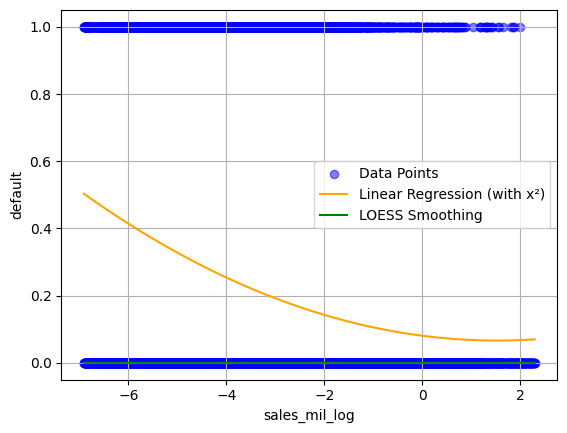

In [116]:
# Scatter plot
plt.scatter(data["sales_mil_log"], data["default"], color="blue", alpha=0.5, label="Data Points")

# Linear regression with quadratic term
X = data["sales_mil_log"].dropna().values.reshape(-1, 1)
y = data["default"].dropna().values
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_range))
plt.plot(X_range, y_pred, color="orange", label="Linear Regression (with x²)")

# LOESS smoothing
lowess_result = lowess(y, X.flatten(), frac=0.9)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color="green", linewidth=1.5, label="LOESS Smoothing")

# Labels and theme
plt.xlabel("sales_mil_log")
plt.ylabel("default")
plt.legend()
plt.grid(True)
plt.show()


In [117]:
def new_func():
    return data.loc[data["default"] == 0, ["sales", "sales_mil", "sales_mil_log"]].assign(
        sales=lambda x: x["sales"].round(3)
    ).sort_values(by="sales", ascending=False).head()

new_func()

,sales,sales_mil,sales_mil_log
4749,9909137.0,9.909137,2.293457
7113,9905000.0,9.905000,2.293040
267,9836644.0,9.836644,2.286115
2360,9835889.0,9.835889,2.286038
11661,9748274.0,9.748274,2.277090


In [118]:
def new_func():
    return data.loc[data["default"] == 0, ["comp_id","default", "sales", "sales_mil", "sales_mil_log"]].assign(
        sales=lambda x: x["sales"].round(3)
    ).sort_values(by="sales", ascending=False).head()

new_func()

,comp_id,default,sales,sales_mil,sales_mil_log
4749,2.292958e+10,0,9909137.0,9.909137,2.293457
7113,5.169306e+10,0,9905000.0,9.905000,2.293040
267,7.999399e+07,0,9836644.0,9.836644,2.286115
2360,5.750829e+09,0,9835889.0,9.835889,2.286038
11661,1.386644e+11,0,9748274.0,9.748274,2.277090


In [119]:
def new_func():
    return data.loc[data["default"] == 0, ["comp_id","default", "sales", "sales_mil", "sales_mil_log"]].assign(
        sales=lambda x: x["sales"].round(3)
    ).sort_values(by="sales", ascending=False).head()

new_func()

,comp_id,default,sales,sales_mil,sales_mil_log
4749,2.292958e+10,0,9909137.0,9.909137,2.293457
7113,5.169306e+10,0,9905000.0,9.905000,2.293040
267,7.999399e+07,0,9836644.0,9.836644,2.286115
2360,5.750829e+09,0,9835889.0,9.835889,2.286038
11661,1.386644e+11,0,9748274.0,9.748274,2.277090


In [120]:
data.loc[data["comp_id"] == 623687744.0, ["sales", "sales_mil", "sales_mil_log", "default", "status_alive"]]

,sales,sales_mil,sales_mil_log,default,status_alive


In [121]:
len(data.loc[(data["default"] == 0) & (data["sales_mil_log"] > 2.5), ["sales", "sales_mil", "sales_mil_log"]])

0

In [122]:
len(data.loc[(data["default"] == 0) & (data["sales_mil_log"] > 0 & (data["sales_mil_log"] < 2.5)), ["sales", "sales_mil", "sales_mil_log"]])

878

In [123]:
def new_func():
    return data.loc[data["default"] == 0, ["comp_id", "default", "sales", "sales_mil", "sales_mil_log"]].assign(
        sales=lambda x: x["sales"].round(3)
    ).describe()

new_func()

,comp_id,default,sales,sales_mil,sales_mil_log
count,1.661700e+04,16617.0,1.661700e+04,16617.000000,16617.000000
mean,1.531301e+11,0.0,2.607911e+05,0.260791,-2.907352
std,1.376179e+11,0.0,8.276480e+05,0.827648,1.661115
min,1.002029e+06,0.0,1.007407e+03,0.001007,-6.900375
25%,2.865001e+10,0.0,1.823333e+04,0.018233,-4.004504
50%,1.144135e+11,0.0,5.108889e+04,0.051089,-2.974188
75%,2.562315e+11,0.0,1.465407e+05,0.146541,-1.920452
max,4.641050e+11,0.0,9.909137e+06,9.909137,2.293457


In [124]:
def new_func():
    return data.loc[data["default"] == 1, ["comp_id", "default", "sales", "sales_mil", "sales_mil_log"]].assign(
        sales=lambda x: x["sales"].round(3)
    ).describe()

new_func()

,comp_id,default,sales,sales_mil,sales_mil_log
count,4.549000e+03,4549.0,4.549000e+03,4549.000000,4549.000000
mean,1.553391e+11,1.0,9.579219e+04,0.095792,-3.802889
std,1.399679e+11,0.0,3.616340e+05,0.361634,1.555191
min,1.001034e+06,1.0,1.000000e+03,0.001000,-6.907755
25%,2.764007e+10,1.0,7.496296e+03,0.007496,-4.893346
50%,1.129232e+11,1.0,2.069259e+04,0.020693,-3.877980
75%,2.674441e+11,1.0,6.033704e+04,0.060337,-2.807809
max,4.637736e+11,1.0,7.331660e+06,7.331659,1.992202


In [125]:
# Linear regressions
ols_s = smf.ols("default ~ sales_mil_log + sales_mil_log_sq", data=data).fit()
print(ols_s.summary())


                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     575.9
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          2.84e-244
Time:                        03:36:37   Log-Likelihood:                -10640.
No. Observations:               21166   AIC:                         2.129e+04
Df Residuals:                   21163   BIC:                         2.131e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0804      0.007  

In [126]:
########################################################################
# sales change
########################################################################
# Note: graphs not in book

# lowess
data["d1_sales_mil_log"].describe()


count    21166.000000
mean        -0.053316
std          0.829605
min         -7.967947
25%         -0.141667
50%          0.000000
75%          0.059986
max         11.012669
Name: d1_sales_mil_log, dtype: float64

/usr/local/python/3.12.1/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 45 rows containing missing values.


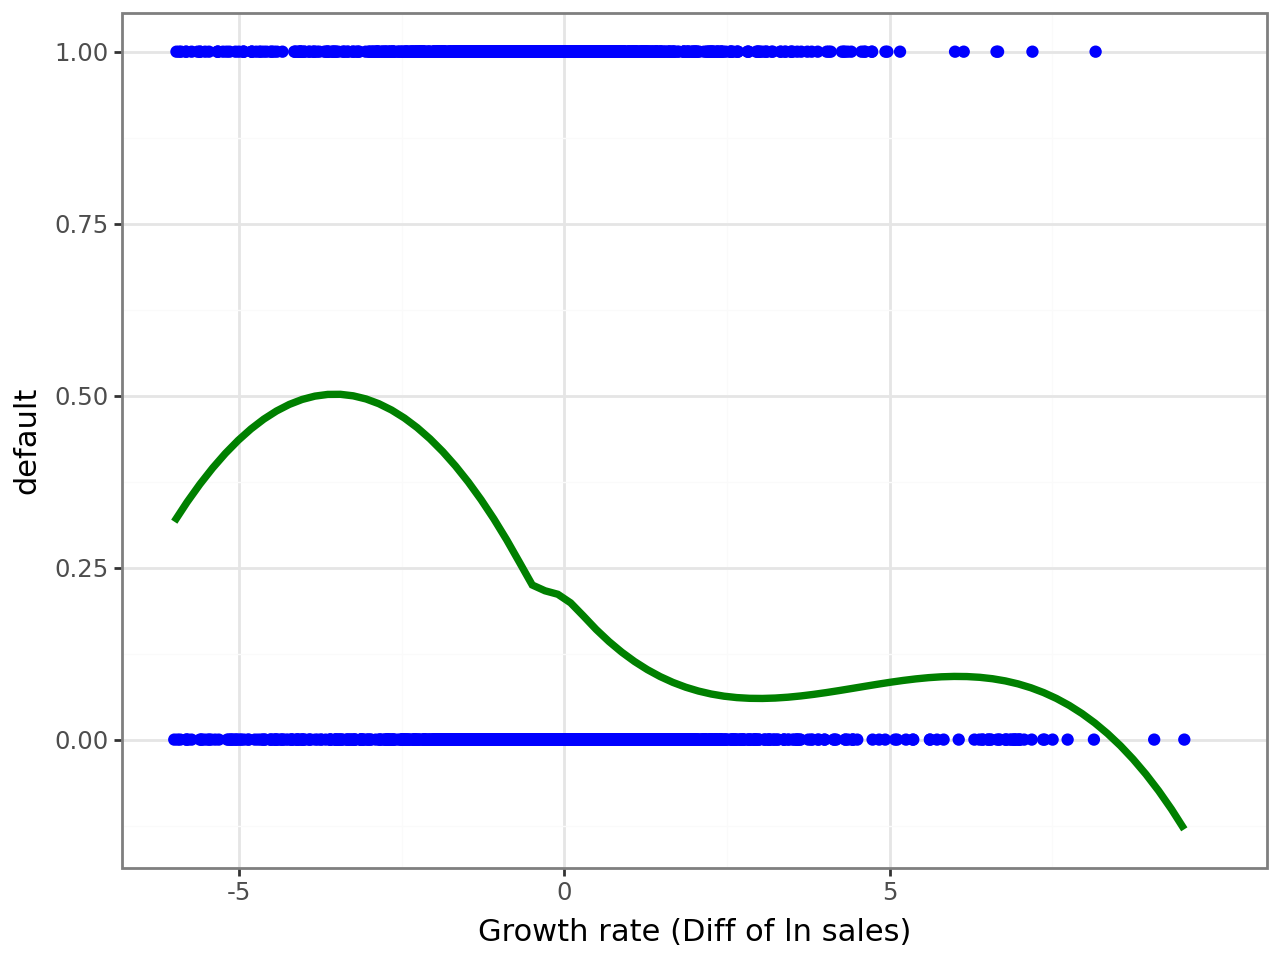

In [127]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(color="blue")
    + geom_smooth(method="loess", color="green", se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=np.arange(-5, 10, 5))
    + theme_bw()
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide


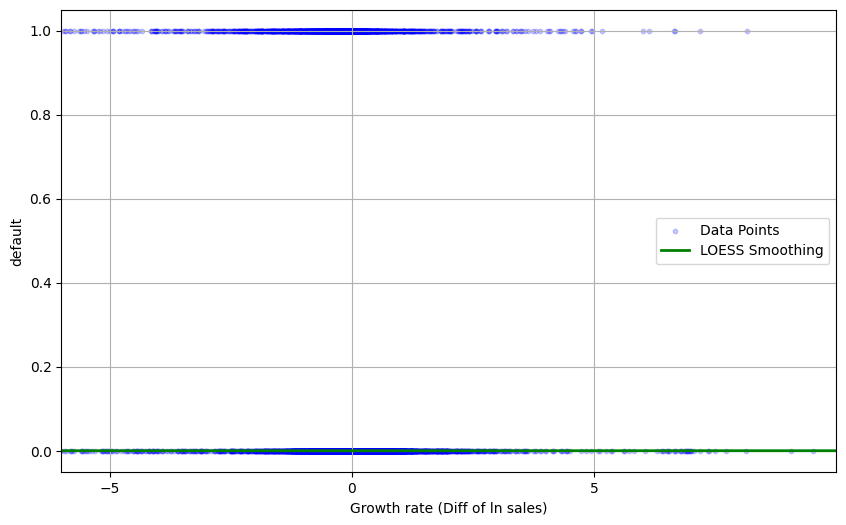

In [128]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Drop NaNs explicitly
df = data[["d1_sales_mil_log", "default"]].dropna()

# Try smaller span
lowess_result = lowess(df["default"], df["d1_sales_mil_log"], frac=0.2)

plt.figure(figsize=(10, 6))
plt.scatter(df["d1_sales_mil_log"], df["default"], color="blue", alpha=0.2, s=10, label="Data Points")
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color="green", linewidth=2, label="LOESS Smoothing")
plt.xlabel("Growth rate (Diff of ln sales)")
plt.ylabel("default")
plt.xlim(-6, 10)
plt.xticks(np.arange(-5, 10, 5))
plt.grid(True)
plt.legend()
plt.show()

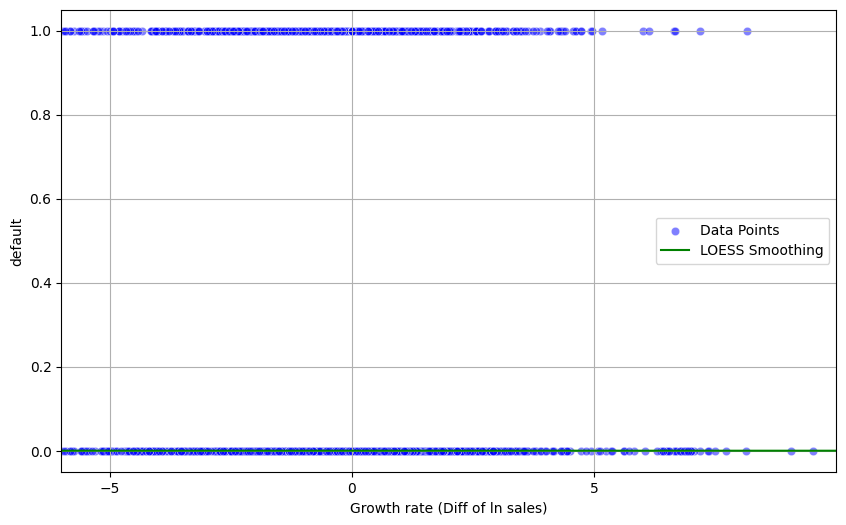

In [129]:
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="d1_sales_mil_log", y="default", data=data, color="blue", alpha=0.5, label="Data Points")

# Calculate LOESS smoothing
lowess_result = lowess(data["default"], data["d1_sales_mil_log"], frac=0.9)

# Plot LOESS smoothing
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color="green", linewidth=1.5, label="LOESS Smoothing")

# Labels and theme
plt.xlabel("Growth rate (Diff of ln sales)")
plt.ylabel("default")
plt.xlim(-6, 10)
plt.xticks(np.arange(-5, 10, 5))
plt.grid(True)
plt.legend()
plt.show()


In [130]:
# generate variables ---------------------------------------------------

data["flag_low_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] < -1.5, 1, 0)
data["flag_high_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] > 1.5, 1, 0)
data["d1_sales_mil_log_mod"] = np.where(
    data["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(data["d1_sales_mil_log"] > 1.5, 1.5, data["d1_sales_mil_log"]),
)
data["d1_sales_mil_log_mod_sq"] = data["d1_sales_mil_log_mod"] ** 2


In [131]:
# no more imputation, drop obs if key vars missing
data = data.dropna(subset=["liq_assets_bs", "foreign", "ind"])


In [132]:
# drop missing
data = data.dropna(subset=["age", "foreign", "material_exp_pl", "m_region_loc"])
data["age"].describe()


count    17367.000000
mean         8.307595
std          6.328291
min          0.000000
25%          2.000000
50%          8.000000
75%         14.000000
max         32.000000
Name: age, dtype: float64

In [133]:
# drop unused factor levels
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()


/usr/local/python/3.12.1/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 990 rows containing missing values.


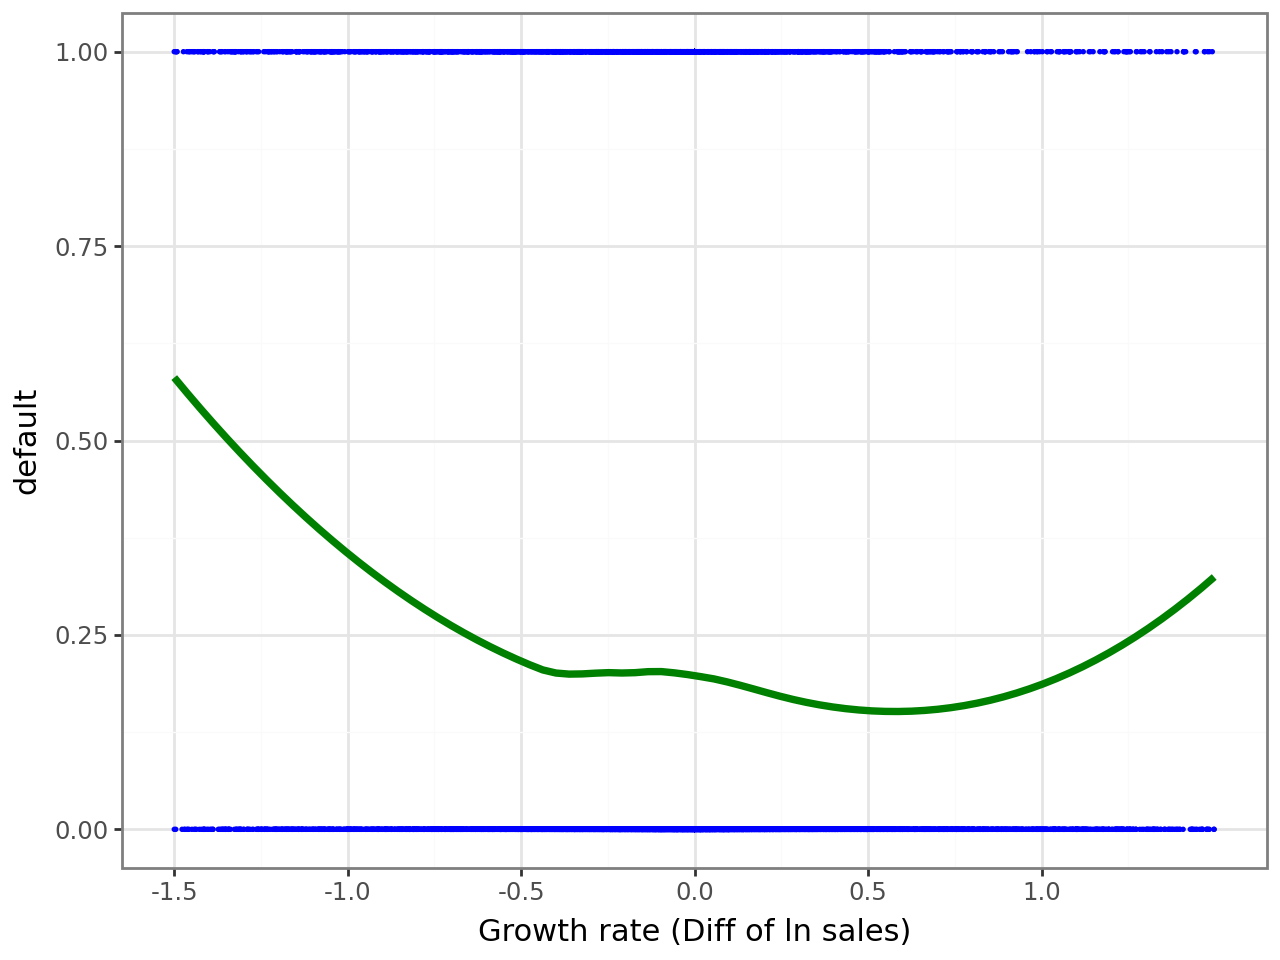

In [134]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(size=0.1, color="blue")
    + geom_smooth(method="loess", color="green", se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-1.5, 1.5), breaks=np.arange(-1.5, 1.5,0.5))
    + theme_bw()
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 136 rows containing missing values.


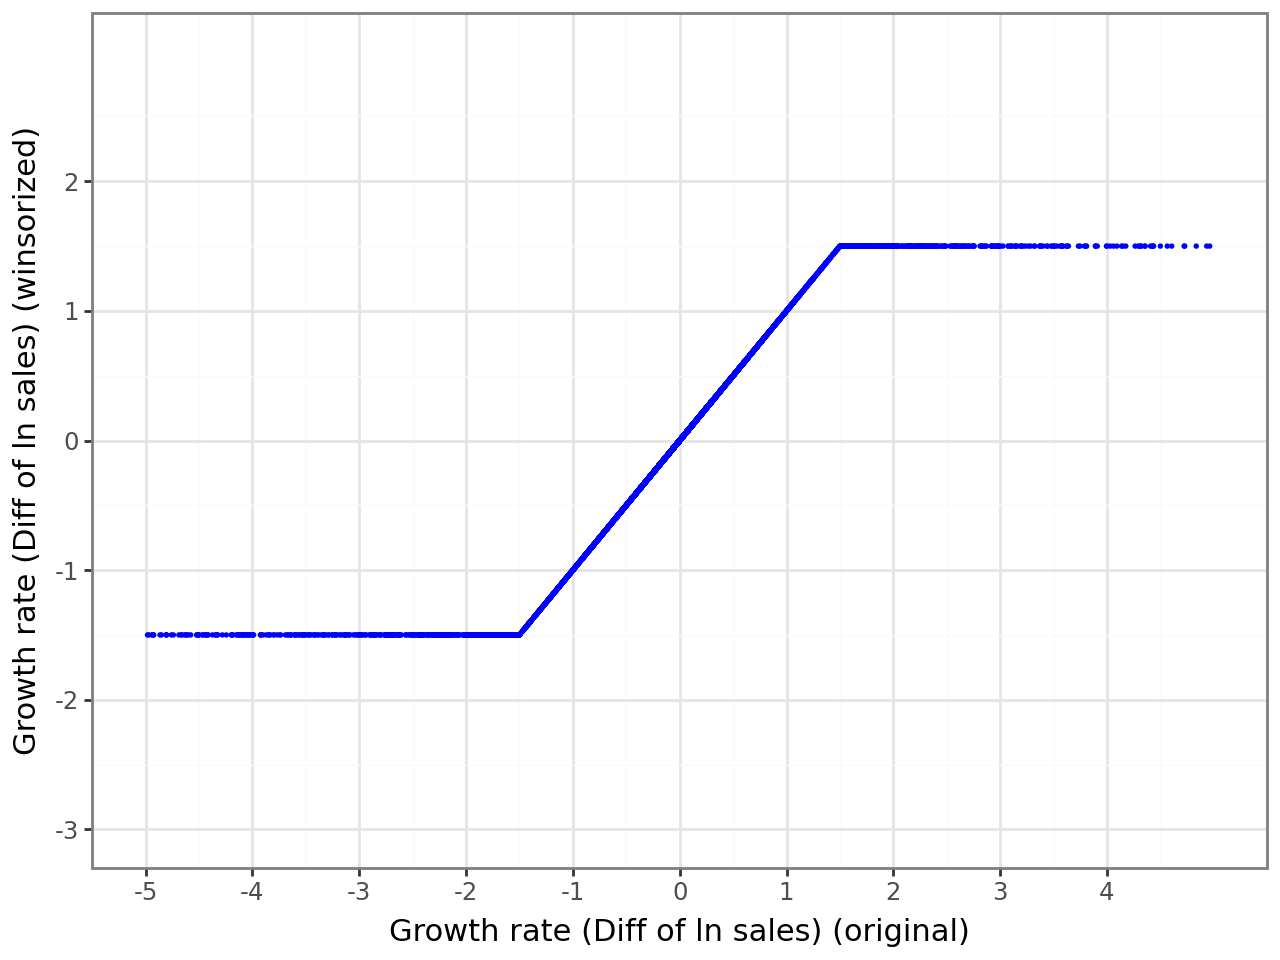

In [135]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=0.1, color="blue")
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + scale_x_continuous(limits=(-5, 5), breaks=np.arange(-5, 5, 1))
    + scale_y_continuous(limits=(-3, 3), breaks=np.arange(-3, 3, 1))
    + theme_bw()
)


In [136]:
data.to_csv("bisnode_firms_clean3.csv", index=False)